In [1]:
import pandas as pd
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')
train_file_path = '/content/drive/MyDrive/LGdata/train.csv'
test_file_path = '/content/drive/MyDrive/LGdata/submission.csv'
df_train = pd.read_csv(train_file_path)
df_test = pd.read_csv(test_file_path)

Mounted at /content/drive


In [7]:
mean_by_category = df_train.groupby(['business_area', 'business_unit', 'response_corporate'])['com_reg_ver_win_rate'].mean()

print(mean_by_category)


business_area       business_unit  response_corporate
corporate / office  AS             LGEAF                 0.040816
                                   LGEAP                 0.066667
                                   LGEAR                 0.003937
                                   LGECB                 0.003937
                                   LGECH                 0.066667
                                                           ...   
transportation      IT             LGEPL                      NaN
                                   LGETH                      NaN
                                   LGEUK                      NaN
                                   LGEUS                      NaN
                    Solution       LGEKR                      NaN
Name: com_reg_ver_win_rate, Length: 949, dtype: float64


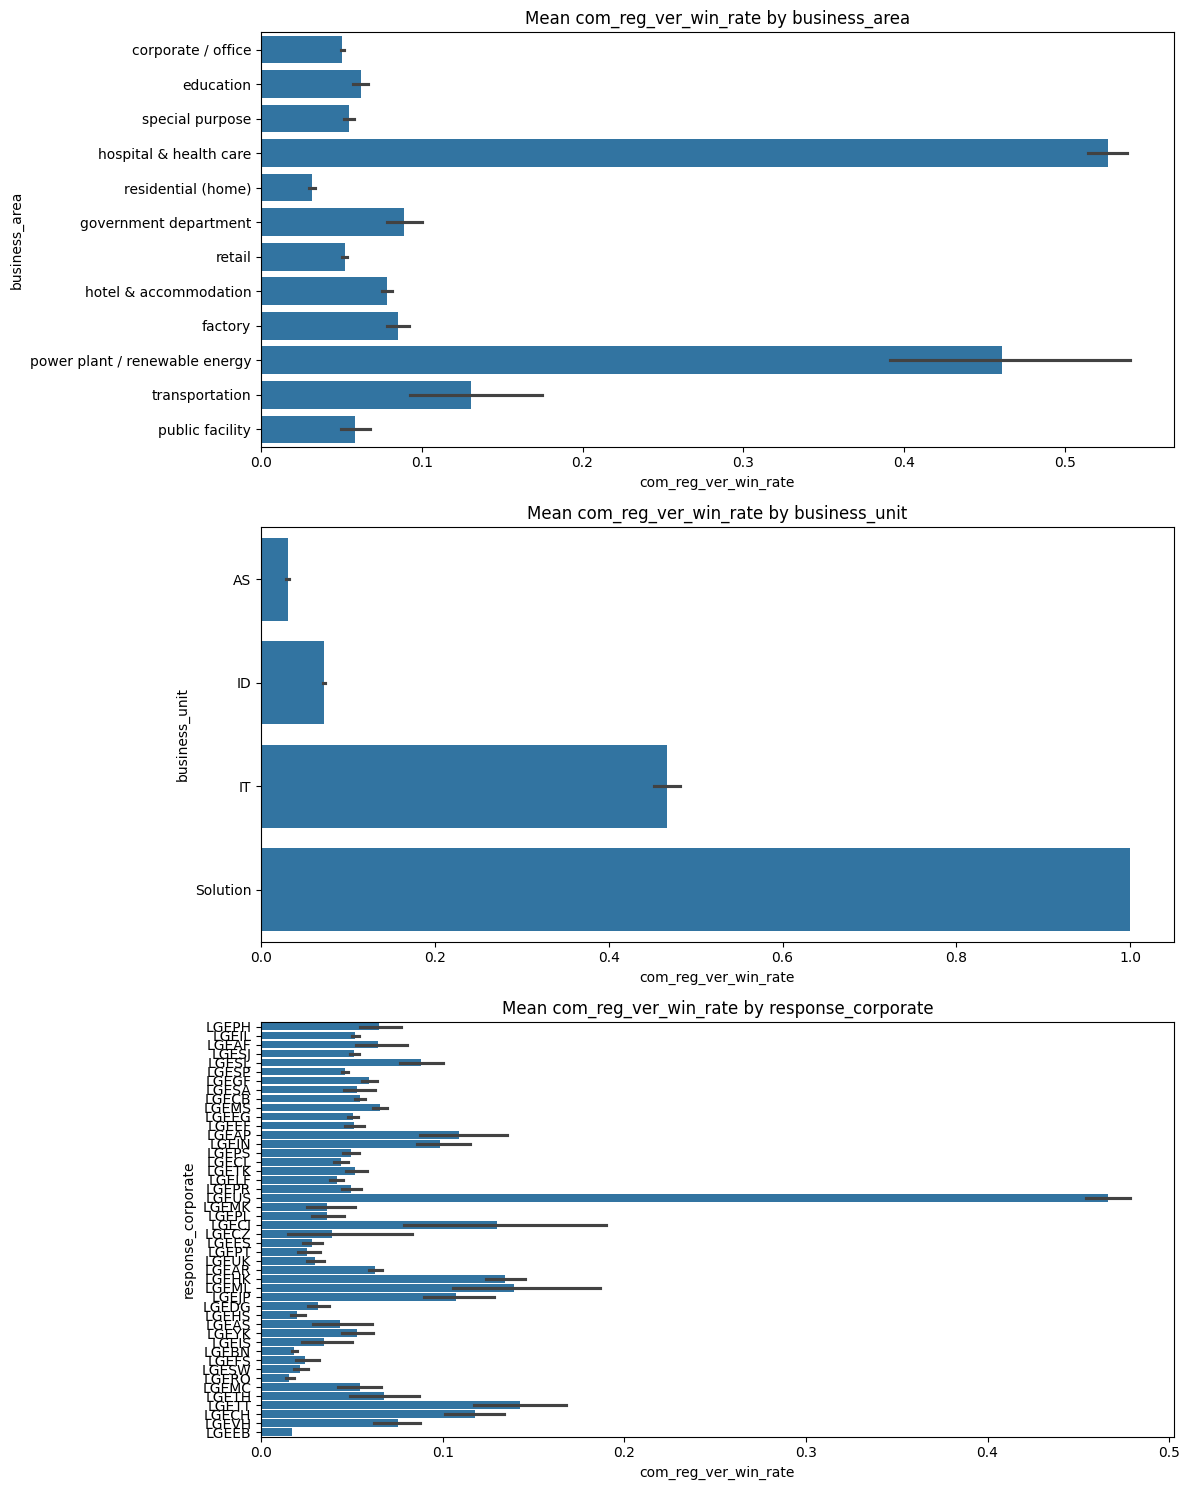

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# 결측치가 없는 데이터 선택
non_null_data = df_train.dropna(subset=['com_reg_ver_win_rate'])

# business_area에 따른 com_reg_ver_win_rate의 평균 계산
mean_by_area = non_null_data.groupby('business_area')['com_reg_ver_win_rate'].mean().reset_index()

# business_unit에 따른 com_reg_ver_win_rate의 평균 계산
mean_by_unit = non_null_data.groupby('business_unit')['com_reg_ver_win_rate'].mean().reset_index()

# response_corporate에 따른 com_reg_ver_win_rate의 평균 계산
mean_by_corporate = non_null_data.groupby('response_corporate')['com_reg_ver_win_rate'].mean().reset_index()

# Subplots 생성
fig, axes = plt.subplots(3, 1, figsize=(12, 15))

# business_area에 따른 막대 그래프
sns.barplot(x='com_reg_ver_win_rate', y='business_area', data=non_null_data, ax=axes[0])
axes[0].set_title('Mean com_reg_ver_win_rate by business_area')

# business_unit에 따른 막대 그래프
sns.barplot(x='com_reg_ver_win_rate', y='business_unit', data=non_null_data, ax=axes[1])
axes[1].set_title('Mean com_reg_ver_win_rate by business_unit')

# response_corporate에 따른 막대 그래프
sns.barplot(x='com_reg_ver_win_rate', y='response_corporate', data=non_null_data, ax=axes[2])
axes[2].set_title('Mean com_reg_ver_win_rate by response_corporate')

plt.tight_layout()
plt.show()


In [11]:
# 결측치 처리 함수 정의
def fill_com_reg_ver_win_rate(row):
    # com_reg_ver_win_rate가 결측치인 경우
    if pd.isnull(row['com_reg_ver_win_rate']):
        # business_unit이 결측치가 아니면 해당 business_unit의 평균값으로 채우기
        if not pd.isnull(row['business_unit']):
            query_result = mean_by_unit[mean_by_unit['business_unit'] == row['business_unit']]['com_reg_ver_win_rate']
            if not query_result.empty:
                return query_result.values[0]
        # business_unit이 결측치이고, business_area가 결측치가 아니면 해당 business_area의 평균값으로 채우기
        elif not pd.isnull(row['business_area']):
            query_result = mean_by_area[mean_by_area['business_area'] == row['business_area']]['com_reg_ver_win_rate']
            if not query_result.empty:
                return query_result.values[0]
        # business_unit, business_area 모두 결측치이고, response_corporate가 결측치가 아니면 해당 response_corporate의 평균값으로 채우기
        elif not pd.isnull(row['response_corporate']):
            query_result = mean_by_corporate[mean_by_corporate['response_corporate'] == row['response_corporate']]['com_reg_ver_win_rate']
            if not query_result.empty:
                return query_result.values[0]
    # com_reg_ver_win_rate가 결측치가 아닌 경우에는 그대로 반환
    else:
        return row['com_reg_ver_win_rate']

# 결측치 처리 함수를 적용하여 com_reg_ver_win_rate 열의 결측치 채우기
df_train['com_reg_ver_win_rate'] = df_train.apply(fill_com_reg_ver_win_rate, axis=1)


In [9]:
# 'business_area', 'business_unit', 'response_corporate', 'com_reg_ver_win_rate'가 모두 결측치인 데이터 수
all_null_count = df_train[df_train[['business_area', 'business_unit', 'response_corporate', 'com_reg_ver_win_rate']].isnull().all(axis=1)].shape[0]

print(f'데이터프레임에서 \'business_area\', \'business_unit\', \'response_corporate\', \'com_reg_ver_win_rate\'가 모두 결측치인 데이터 수: {all_null_count}')


데이터프레임에서 'business_area', 'business_unit', 'response_corporate', 'com_reg_ver_win_rate'가 모두 결측치인 데이터 수: 0
